<a href="https://colab.research.google.com/github/Morgoth636/ML_WS22-23/blob/main/ML_Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Banknote Dataset: Support Vector Machine/Binary Classification


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, f1_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

loading the dataset...

In [ ]:
url = "https://raw.githubusercontent.com/Morgoth636/ML_WS22-23/main/BankNote_Authentication.csv"
df = pd.read_csv(url)


splitting the dataset in train data and test data with 20% test data and 80% training data

In [ ]:
y = df["class"]
X = df.loc[:, df.columns!="class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

setting up the classifier model and fitting the model to the training data...

In [ ]:
from sklearn import metrics
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

SVC(gamma='auto')

predicting on the test dataset...

In [ ]:
y_pred = clf.predict(X_test)

creating and plotting the confusion matrix for the classifier...

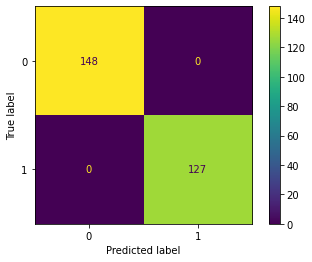

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('\n')
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('\n')
print('F1: %.3f' % f1_score(y_test, y_pred))
print('\n')
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Precision: 1.000


Recall: 1.000


F1: 1.000


Accuracy: 1.000


#Wine Dataset: Multi Layer Perceptron/Multiclass Classification

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, scale
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, f1_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=11, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(11, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer= Adam(learning_rate=1e-3), metrics=['accuracy'])


In [ ]:
def load_dataset(red):
  if red:
    url = "https://raw.githubusercontent.com/Morgoth636/ML_WS22-23/main/winequality-red.csv"
    df = pd.read_csv(url)
    y = df["quality"]
    X = df.loc[:, df.columns!="quality"]
    X = scale(X)
    return X, y
  else:
    url = "https://raw.githubusercontent.com/Morgoth636/ML_WS22-23/main/winequality-white.csv"
    df = pd.read_csv( url, sep=';')
    y = df["quality"]
    X = df.loc[:, df.columns!='quality']
    X = scale(X)
    return X, y

In [ ]:
X, y = load_dataset(red=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=11)
y_test = to_categorical(y_test, num_classes=11)
model.fit(X_train, y_train, epochs=200)
  

Epoch 1/200
40/40 [==============================] - 1s 2ms/step - loss: 2.3202 - accuracy: 0.2260
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 1.6875 - accuracy: 0.4543
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 1.2876 - accuracy: 0.5035
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 1.1948 - accuracy: 0.5207
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 1.1131 - accuracy: 0.5426
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 1.1014 - accuracy: 0.5450
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 1.0882 - accuracy: 0.5629
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 1.0810 - accuracy: 0.5606
Epoch 9/200
40/40 [==============================] - 0s 2ms/step - loss: 1.0581 - accuracy: 0.5739
Epoch 10/200
40/40 [==============================] - 0s 2ms/step - loss: 1.0513 - accuracy: 0.5708
Epoch 11/

In [ ]:
results = model.evaluate(X_test, y_test)


10/10 [==============================] - 0s 2ms/step - loss: 0.8582 - accuracy: 0.6062
